In [119]:
from collections import defaultdict
from nltk.corpus import stopwords
from wordcloud import WordCloud
import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import sys
sys.path.append('../')

from src.config import *

stop = set(stopwords.words('english'))

data_url = f'{DATA_FOLDER_PATH_PROCESSED}/data_consolidated.xlsx'
df = pd.read_excel(data_url)

In [120]:
df.head(-20)

,Request ID,Title,Product Name,Length,Language,Title_Processed,Title_Translated,Tags
0,1130253,Rerun workflow and Create workflow option not ...,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",8,en,Rerun workflow and Create workflow option not ...,Rerun workflow and Create workflow option not ...,workflow workflow option
1,1130796,SH-PED: Patch Log4j for proSource 2018.3,"ProSource, InnerLogix",5,en,SH PED: Patch for proSource .,SH PED : Patch for proSource .,patch prosource
2,1131191,SH-PED: issue with ProSource services,"ProSource, InnerLogix",6,en,SH PED: issue with ProSource services,SH PED : issue with ProSource services,prosource service
3,1131193,SH-PED: ProSource new License file,"ProSource, InnerLogix",6,en,SH PED: ProSource new License file,SH PED : ProSource new License file,prosource license file
4,1135119,Production by zone/segment,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",4,en,Production by zone segment,Production by zone segment,production zone segment
...,...,...,...,...,...,...,...,...
115799,753257,[Ext] RE- REQ722937- 您的请求已被 关闭- 'License serve...,"Omega, VISTA, OMNI3D",10,zh,Ext RE 您的请求已被 关闭 License server crash,Ext RE Your request has been closed License se...,closed license server crash
115800,750009,RE导入油水CASE的转换问题处理,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",10,zh,RE 导入油水 CASE 的转换问题处理,Handling the conversion problem of RE importin...,handling conversion importing oilwater case
115801,808820,模型中断层水体的理解,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",7,zh,模型中断层水体的理解,Understanding fault water bodies in the model,understanding fault water body model
115802,815698,Phone-IX lgr添加后初始化报错,"RE (Petrel RE, DELFI RE, ECLIPSE, INTERSECT, O...",10,zh,Phone IX lgr 添加后初始化报错,Phone Intersect local grid refinement (LGR) in...,phone intersect local grid refinement lgr init...


In [121]:
def create_corpus(df, col):
    corpus = []

    for x in tqdm.tqdm(df[col].str.split()):
        if x == x:
            for i in x:
                corpus.append(i)

    return corpus

100%|██████████| 115824/115824 [00:00<00:00, 2834245.80it/s]


<BarContainer object of 30 artists>

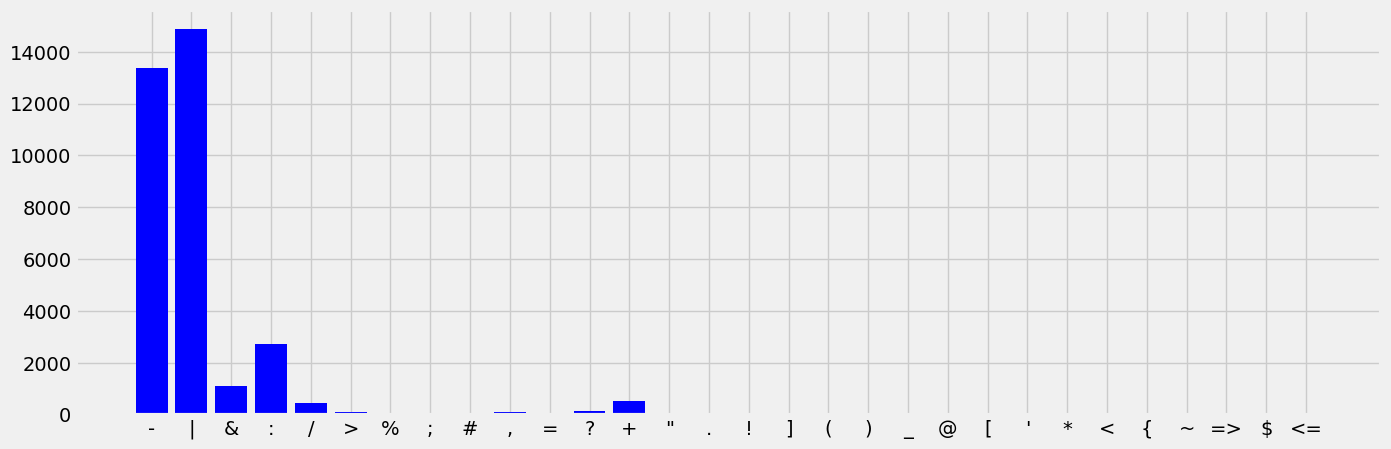

In [122]:
import string

corpus = create_corpus(df, 'Title')
plt.figure(figsize=(15,5))

dic = defaultdict(int)
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y = zip(*dic.items())
plt.bar(x,y, color = 'blue')

100%|██████████| 115824/115824 [00:00<00:00, 3183973.12it/s]


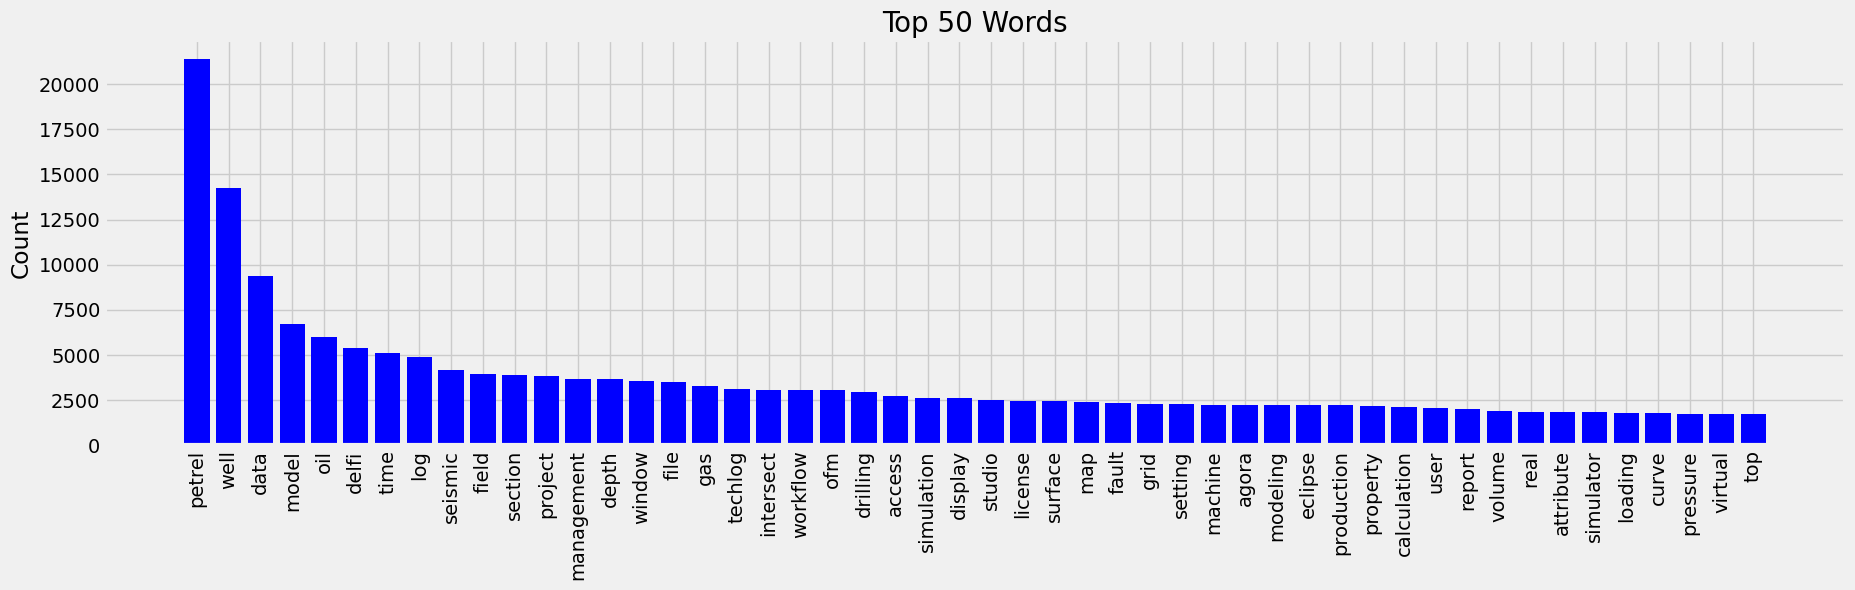

In [123]:
corpus = create_corpus(df, 'Tags')

dic = defaultdict(int)
for word in corpus:
    if word not in stop:
        dic[word] += 1
        
top_n = 50 
top = sorted(dic.items(), key=lambda x:x[1], reverse=True)[:top_n]

plt.rcParams['figure.figsize'] = (20, 5)
plt.style.use('fivethirtyeight')
x, y = zip(*top)
plt.bar(x, y, color = 'blue')
plt.title(f'Top {top_n} Words', fontsize = 20)
# plt.xlabel('Words')
plt.ylabel('Count')
plt.xticks(rotation = 90, horizontalalignment = 'center')
plt.show()

100%|██████████| 115824/115824 [00:00<00:00, 2849991.88it/s]


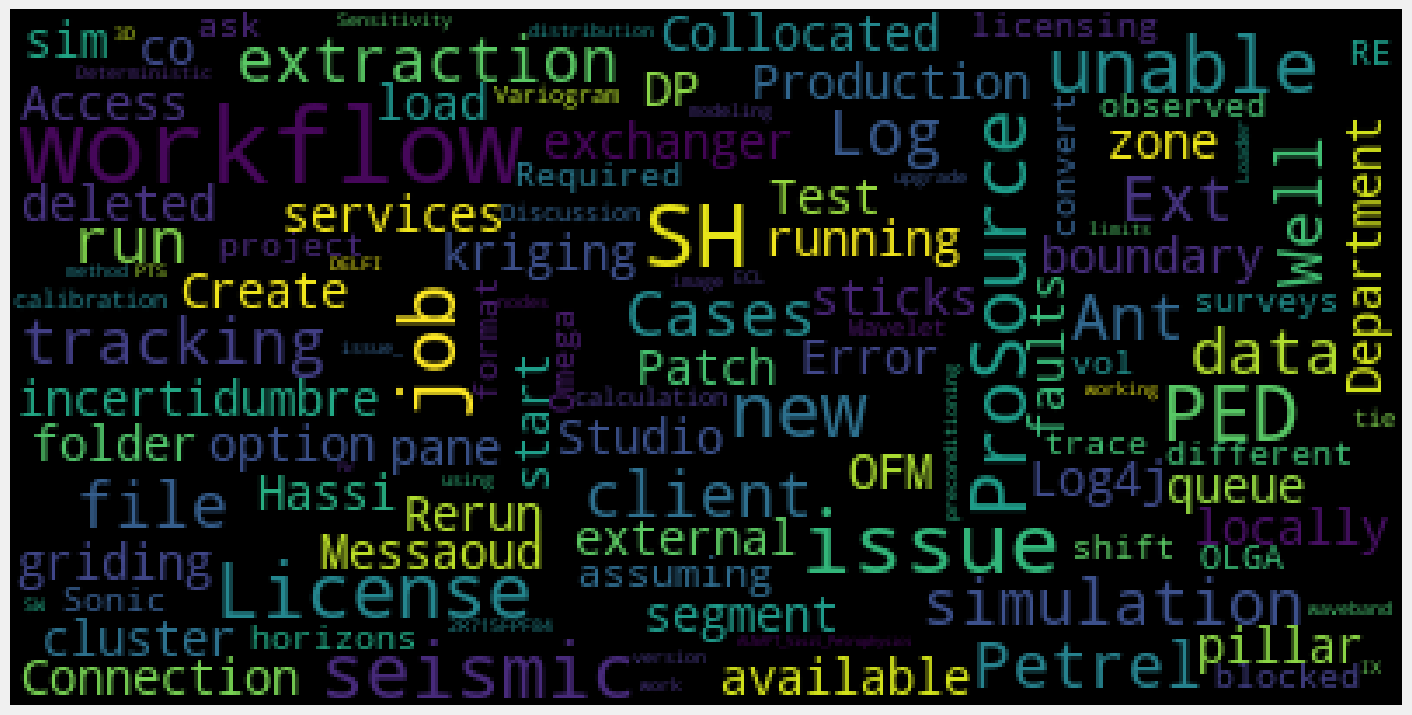

In [124]:
corpus = create_corpus(df, 'Title')

plt.figure(figsize=(16,12))
word_cloud = WordCloud(
                        background_color='black',
                        max_font_size = 30
                        ).generate(" ".join(corpus[:200]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

100%|██████████| 115824/115824 [00:00<00:00, 2773628.70it/s]


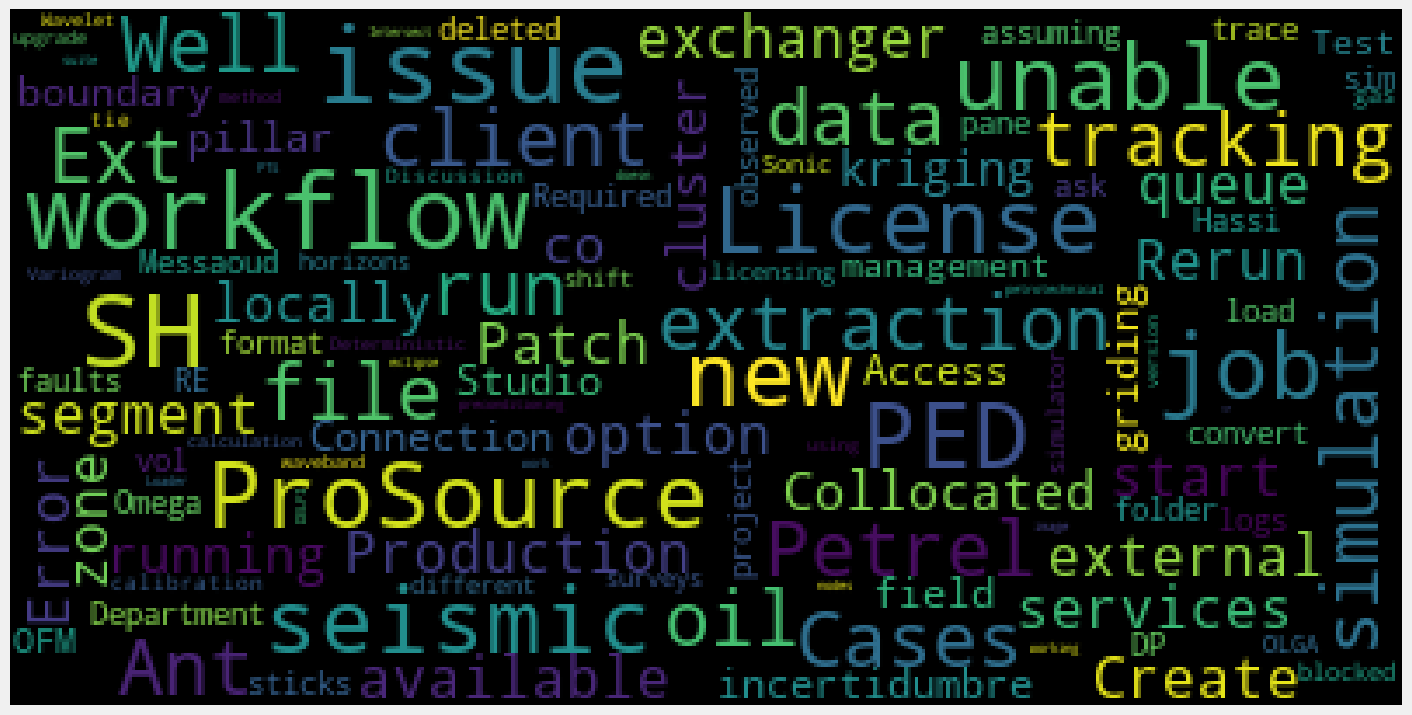

In [125]:
corpus = create_corpus(df, 'Title_Translated')

plt.figure(figsize=(16,12))
word_cloud = WordCloud(
                        background_color='black',
                        max_font_size = 30
                        ).generate(" ".join(corpus[:200]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()

100%|██████████| 115824/115824 [00:00<00:00, 3083531.05it/s]


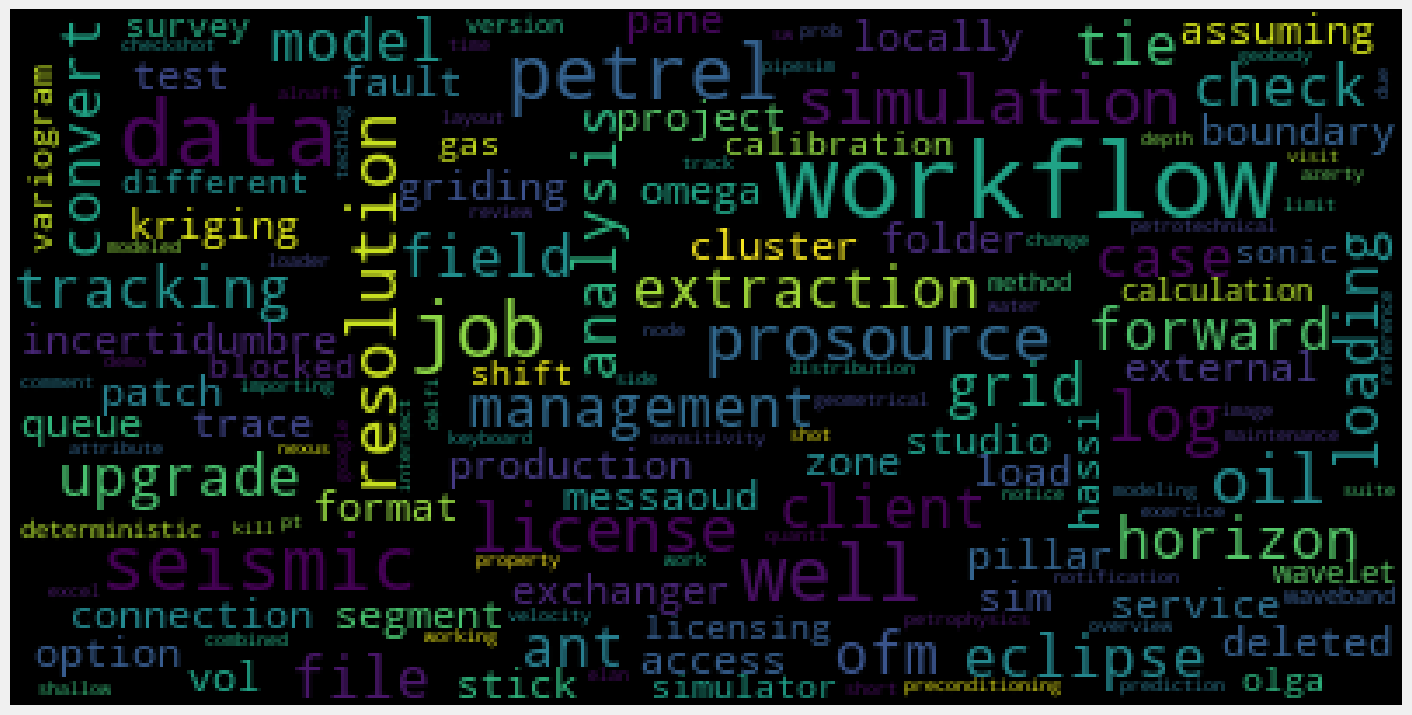

In [126]:
corpus = create_corpus(df, 'Tags')

plt.figure(figsize=(16,12))
word_cloud = WordCloud(
                        background_color='black',
                        max_font_size = 30
                        ).generate(" ".join(corpus[:200]))
plt.imshow(word_cloud)
plt.axis('off')
plt.show()